# 2.1. Charger les bibliothèques Python necessaires (pandas, numpy, statsmodels,etc.).

In [62]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 2.2. Importer les donnees et afficher les cinq premières lignes.

In [7]:
#Importation de la base de données
df=pd.read_csv("ice_cream_vs_heater (1).csv")

In [9]:
df

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21
...,...,...,...
193,2020-02,34,45
194,2020-03,25,44
195,2020-04,25,53
196,2020-05,27,70


# 2.3. Convertir la colonne Month en format datetime et l’utiliser commeindex.

In [27]:
# Conversion de 'Month' en format datetime et définition comme index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# 2.4. Tracer l’ ́evolution des variables heater et ice cream dans le temps.

Voici l'évolution des consommations de chauffage et de crème glacée dans le temps. 
On observe une tendance saisonnière inverse : quand l'une augmente, l'autre diminue.

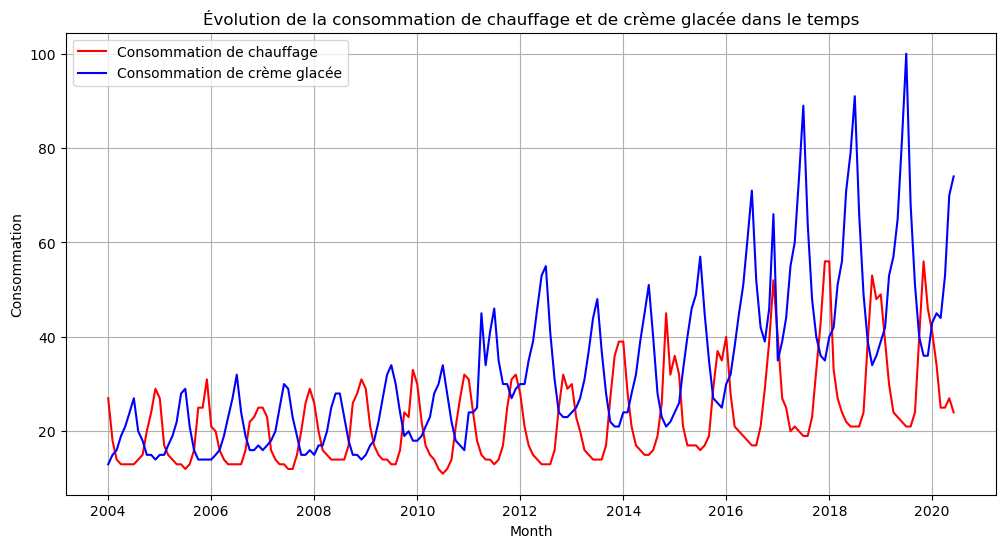

In [33]:
# Tracé des séries temporelles
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['heater'], label='Consommation de chauffage', color='red')
plt.plot(df.index, df['ice cream'], label='Consommation de crème glacée', color='blue')
plt.xlabel("Month")
plt.ylabel("Consommation")
plt.title("Évolution de la consommation de chauffage et de crème glacée dans le temps")
plt.legend()
plt.grid()
plt.show()

# 3.1. Effectuer le test de Dickey-Fuller Augment ́e (ADF) pour chaque variable.

In [35]:
# Test de stationnarité

def adf_test(series, name):
    result = adfuller(series)
    print(f"Résultat du test ADF pour {name}:")
    print(f"Statistique de test ADF : {result[0]:.4f}")
    print(f"p-value : {result[1]:.4f}")
    print("Valeurs critiques :")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.4f}")
    print("Conclusion :", "Stationnaire" if result[1] < 0.05 else "Non stationnaire")
    print("-" * 50)

adf_test(df['heater'], "heater")
adf_test(df['ice cream'], "ice cream")

Résultat du test ADF pour heater:
Statistique de test ADF : 0.9501
p-value : 0.9937
Valeurs critiques :
	1%: -3.4660
	5%: -2.8772
	10%: -2.5751
Conclusion : Non stationnaire
--------------------------------------------------
Résultat du test ADF pour ice cream:
Statistique de test ADF : -0.3039
p-value : 0.9249
Valeurs critiques :
	1%: -3.4664
	5%: -2.8774
	10%: -2.5752
Conclusion : Non stationnaire
--------------------------------------------------


# 3.2. Si une s ́erie n’est pas stationnaire, appliquer la diff ́erenciation et refaire le test.

In [37]:
# Différenciation car la série n'est pas stationnaire
df_diff = df.diff().dropna()
adf_test(df_diff['heater'], "heater (différenciée)")
adf_test(df_diff['ice cream'], "ice cream (différenciée)")

Résultat du test ADF pour heater (différenciée):
Statistique de test ADF : -16.9673
p-value : 0.0000
Valeurs critiques :
	1%: -3.4660
	5%: -2.8772
	10%: -2.5751
Conclusion : Stationnaire
--------------------------------------------------
Résultat du test ADF pour ice cream (différenciée):
Statistique de test ADF : -4.7817
p-value : 0.0001
Valeurs critiques :
	1%: -3.4664
	5%: -2.8774
	10%: -2.5752
Conclusion : Stationnaire
--------------------------------------------------


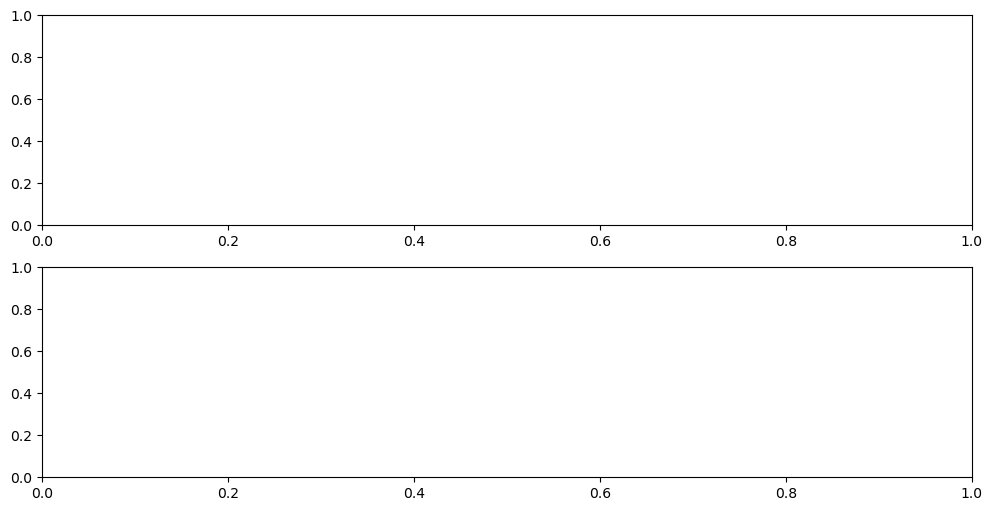

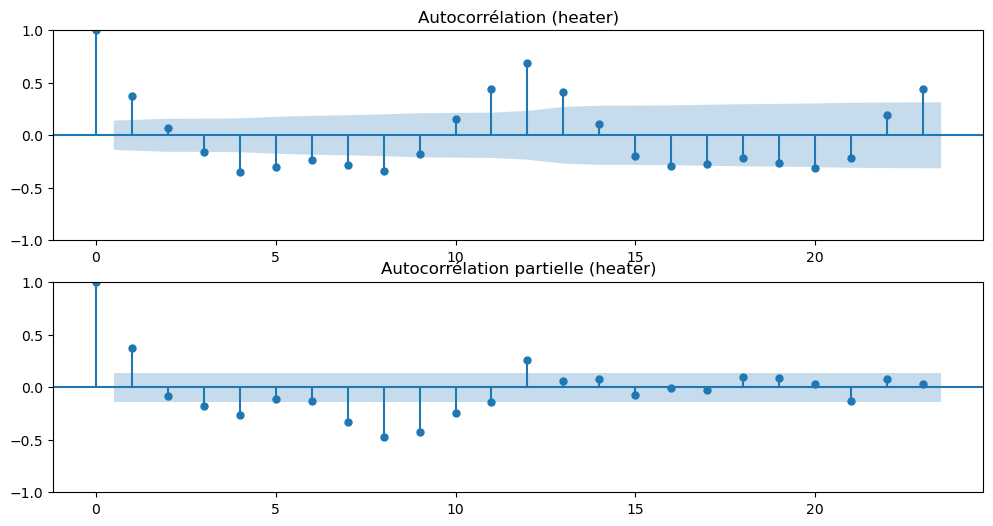

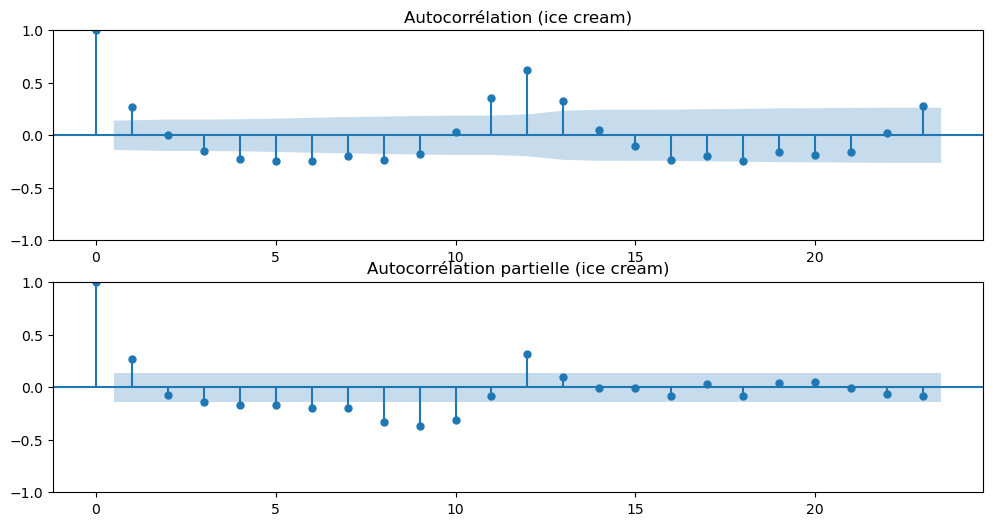

In [43]:
# Tracé des ACF et PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df_diff['heater'], ax=axes[0], title="Autocorrélation (heater)")
plot_pacf(df_diff['heater'], ax=axes[1], title="Autocorrélation partielle (heater)")
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df_diff['ice cream'], ax=axes[0], title="Autocorrélation (ice cream)")
plot_pacf(df_diff['ice cream'], ax=axes[1], title="Autocorrélation partielle (ice cream)")
plt.show()


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_heater = SARIMAX(df['heater'], order=(1,1,1))
result_heater = model_heater.fit()

model_ice_cream = SARIMAX(df['ice cream'], order=(1,1,1))
result_ice_cream = model_ice_cream.fit()

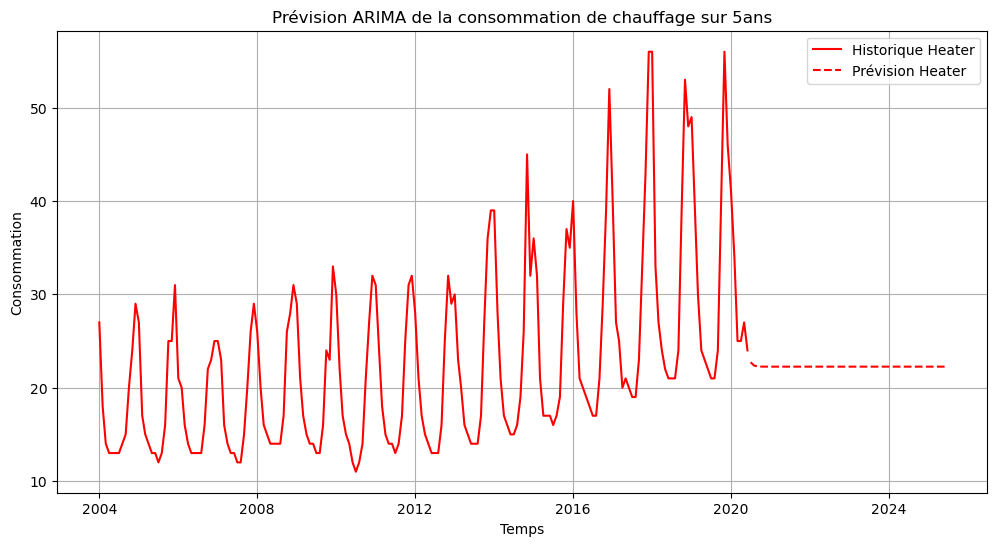

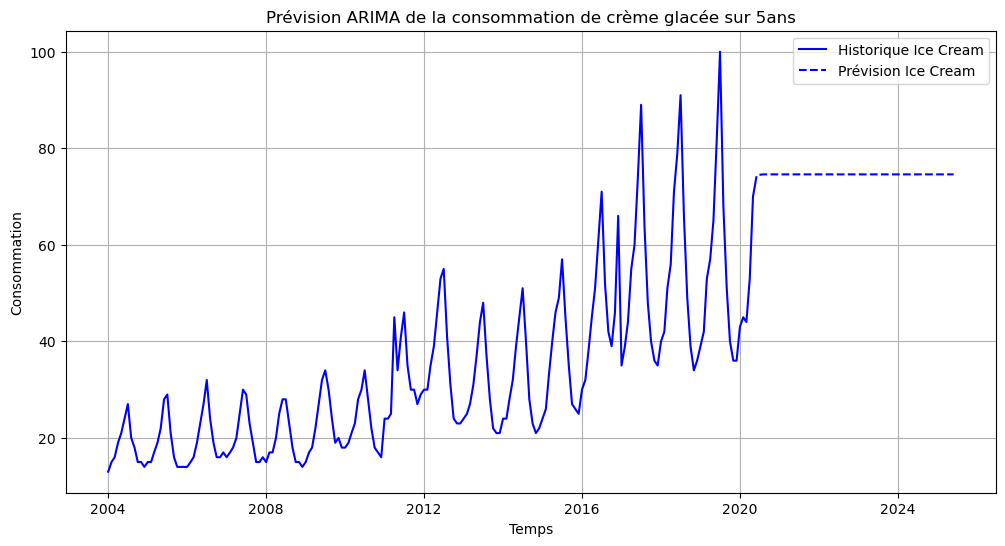

In [59]:
# Prévision sur 5 ans (60 mois)
pred_heater = result_heater.forecast(steps=60)
pred_ice_cream = result_ice_cream.forecast(steps=60)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['heater'], label='Historique Heater', color='red')
plt.plot(pd.date_range(df.index[-1], periods=60, freq='M'), pred_heater, label='Prévision Heater', linestyle='dashed', color='red')
plt.xlabel("Temps")
plt.ylabel("Consommation")
plt.title("Prévision ARIMA de la consommation de chauffage sur 5ans")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['ice cream'], label='Historique Ice Cream', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=60, freq='M'), pred_ice_cream, label='Prévision Ice Cream', linestyle='dashed', color='blue')
plt.xlabel("Temps")
plt.ylabel("Consommation")
plt.title("Prévision ARIMA de la consommation de crème glacée sur 5ans")
plt.legend()
plt.grid()
plt.show()

# Sépararion en ensemble d'entrainement et de tes

In [85]:
# Séparation des données en ensemble d'entraînement (80%) et de test (20%)
train_data = df['heater'][:-15]
test_data = df['ice cream'][-15:]

In [87]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 heater   No. Observations:                  183
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -535.300
Date:                Wed, 12 Mar 2025   AIC                           1078.601
Time:                        15:57:31   BIC                           1091.417
Sample:                    01-01-2004   HQIC                          1083.796
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2016      0.067     18.050      0.000       1.071       1.332
ar.L2         -0.5369      0.042    -12.926      0.000      -0.618      -0.455
ma.L1         -0.9569      0.043    -22.507      0.0

# Vérification du modèle

# Graphiques des résidus

<Figure size 1000x500 with 0 Axes>

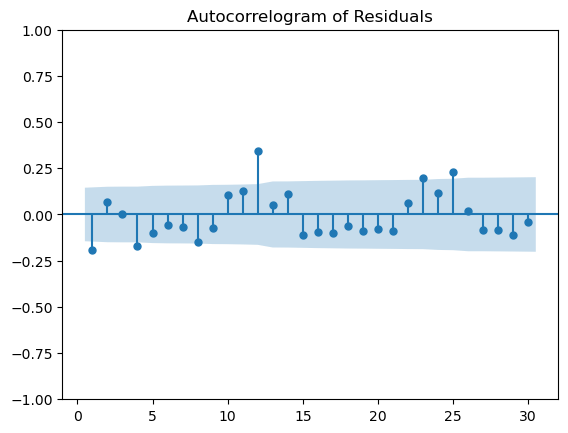

<Figure size 1000x500 with 0 Axes>

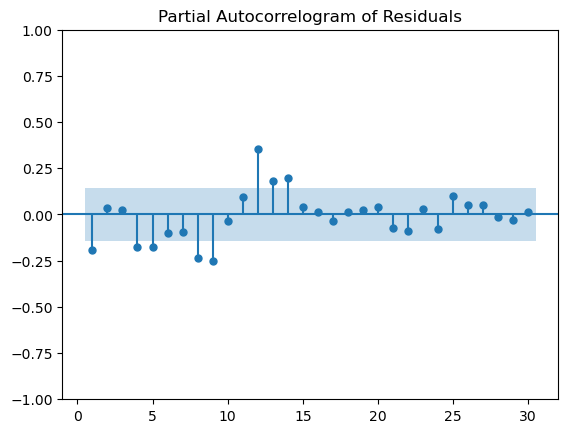

In [91]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les résidus
residuals = model_fit.resid

# Tracer l'ACF des résidus
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

# Tracer la PACF des résidus
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()

# Prédiction

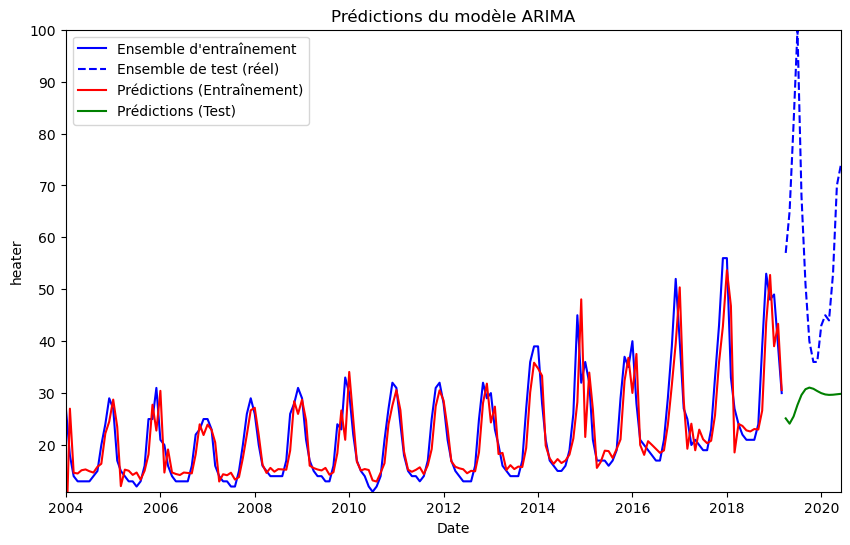

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('heater')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

In [98]:
# Mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 3.326901         28.677273
1      MSE                24.848827       1189.469002
2     RMSE                 4.984860         34.488679
3       R²                 0.722752         -2.683631
